<a href="https://colab.research.google.com/github/thaohung13/Project.cuoi.ky.AI/blob/main/DETECT10FLOWER(91.9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/DATA2/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Hong'):
    output = 0
  if file.startswith('Su'):
    output = 1
  if file.startswith('Sen'):
    output = 2
  if file.startswith('Mai'):
    output = 3
  if file.startswith('PhongLuDo'):
    output = 4
  if file.startswith('HongMon'):
    output = 5
  if file.startswith('ThienDieu'):
    output = 6
  if file.startswith('CucVanTho'):
    output = 7
  if file.startswith('HuongDuong'):
    output = 8
  if file.startswith('DaUyenThao'):
    output = 9
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_PHOTOS1', photos)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_LABELS1', labels)

(1238, 128, 128, 3) (1238,)


In [5]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_PHOTOS1.npy')
labels = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_LABELS1.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [6]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9

In [7]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
    rescale=1./255,
	width_shift_range=0.2,
    height_shift_range=0.2,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [8]:
y_train.shape

(990, 10)

In [9]:
# Training 
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=200,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-9-e3ce0a308667>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/200
16/16 [==============================] - 19s 527ms/step - loss: 2.1868 - accuracy: 0.2495 - val_loss: 2.1866 - val_accuracy: 0.2298
Epoch 2/200
16/16 [==============================] - 6s 370ms/step - loss: 2.0718 - accuracy: 0.2869 - val_loss: 2.1174 - val_accuracy: 0.2298
Epoch 3/200
16/16 [==============================] - 5s 333ms/step - loss: 1.9348 - accuracy: 0.2848 - val_loss: 1.8922 - val_accuracy: 0.2419
Epoch 4/200
16/16 [==============================] - 5s 334ms/step - loss: 1.7732 - accuracy: 0.3414 - val_loss: 1.6024 - val_accuracy: 0.4718
Epoch 5/200
16/16 [==============================] - 7s 439ms/step - loss: 1.5643 - accuracy: 0.4192 - val_loss: 1.4409 - val_accuracy: 0.4516
Epoch 6/200
16/16 [==============================] - 5s 335ms/step - loss: 1.4745 - accuracy: 0.4465 - val_loss: 1.2764 - val_accuracy: 0.5605
Epoch 7/200
16/16 [==============================] - 6s 386ms/step - loss: 1.4057 - accuracy: 0.4788 - val_loss: 1.2433 - val_accuracy: 0.552

In [10]:
#Đoạn code này đánh giá độ chính xác và sự mất mát của mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

8/8 [==============================] - 1s 32ms/step - loss: 53.1204 - accuracy: 0.9194
Accuracy: 0.9193548560142517
Loss: 53.12040710449219


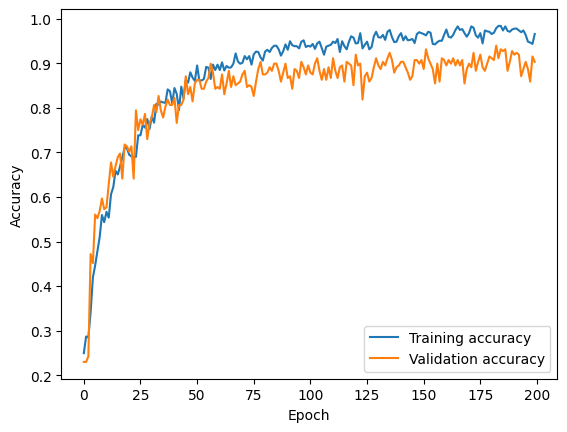

In [11]:
# plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'], label='Training accuracy')
plt.plot(train.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

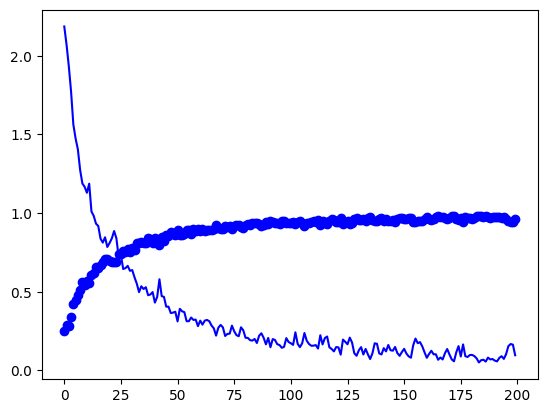

In [12]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [13]:
#Save model
model.save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/MODEL.h5')